In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu archivo imputado
df = pd.read_excel('df_objetivo/df_objetivo_imputado.xlsx')

# Lista de variables numéricas disponibles
variables_numericas = [
    "AVANCE_CARRERA", "AVANCE_ESPERADO", "ATRASO_PORCENTUAL",
    "PAPA", "EDAD", "NUMERO_MATRICULAS", "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Calcular la matriz de correlación de Spearman
correlacion_spearman = df[variables_numericas].corr(method="spearman")

# Mostrar la matriz
print(correlacion_spearman)


                   AVANCE_CARRERA  AVANCE_ESPERADO  ATRASO_PORCENTUAL  \
AVANCE_CARRERA           1.000000         0.925149          -0.437631   
AVANCE_ESPERADO          0.925149         1.000000          -0.130316   
ATRASO_PORCENTUAL       -0.437631        -0.130316           1.000000   
PAPA                     0.259144         0.058363          -0.594078   
EDAD                     0.529962         0.574284          -0.054680   
NUMERO_MATRICULAS        0.925149         1.000000          -0.130316   
PBM_CALCULADO           -0.076187        -0.061269           0.026274   
PUNTAJE_ADMISION         0.006851         0.037923           0.074753   

                       PAPA      EDAD  NUMERO_MATRICULAS  PBM_CALCULADO  \
AVANCE_CARRERA     0.259144  0.529962           0.925149      -0.076187   
AVANCE_ESPERADO    0.058363  0.574284           1.000000      -0.061269   
ATRASO_PORCENTUAL -0.594078 -0.054680          -0.130316       0.026274   
PAPA               1.000000 -0.065067     

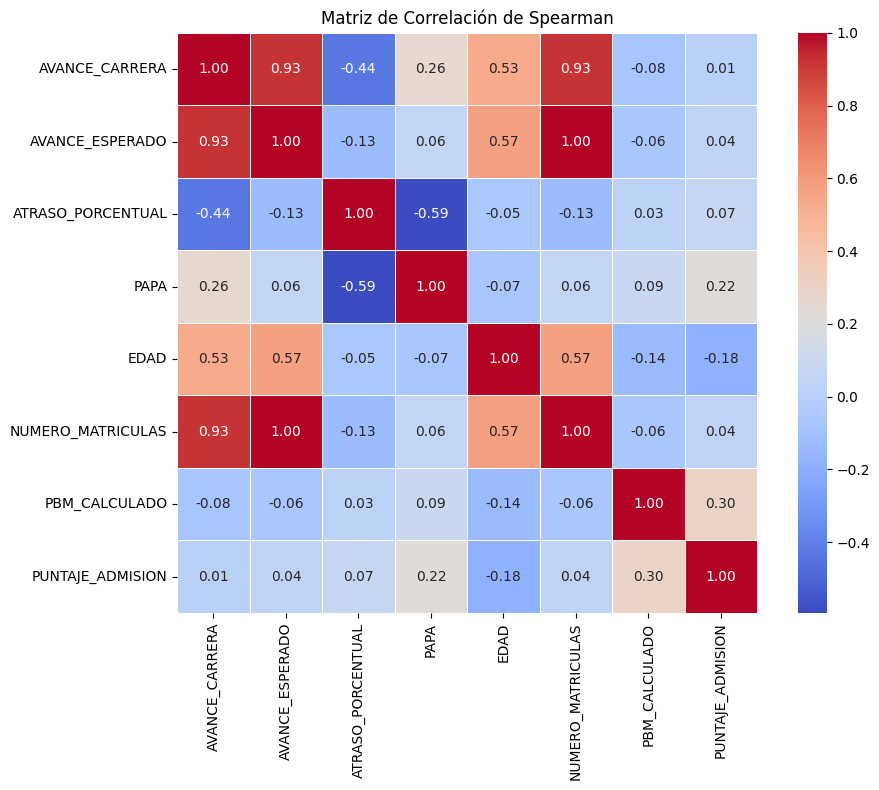

In [7]:
# Variables numéricas a incluir
variables_numericas = [
    "AVANCE_CARRERA", "AVANCE_ESPERADO", "ATRASO_PORCENTUAL",
    "PAPA", "EDAD", "NUMERO_MATRICULAS", "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Calcular matriz de correlación de Spearman
corr_spearman = df[variables_numericas].corr(method="spearman")

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Matriz de Correlación de Spearman")
plt.tight_layout()
plt.show()

# scatterplots con curvas de ajuste (LOESS)

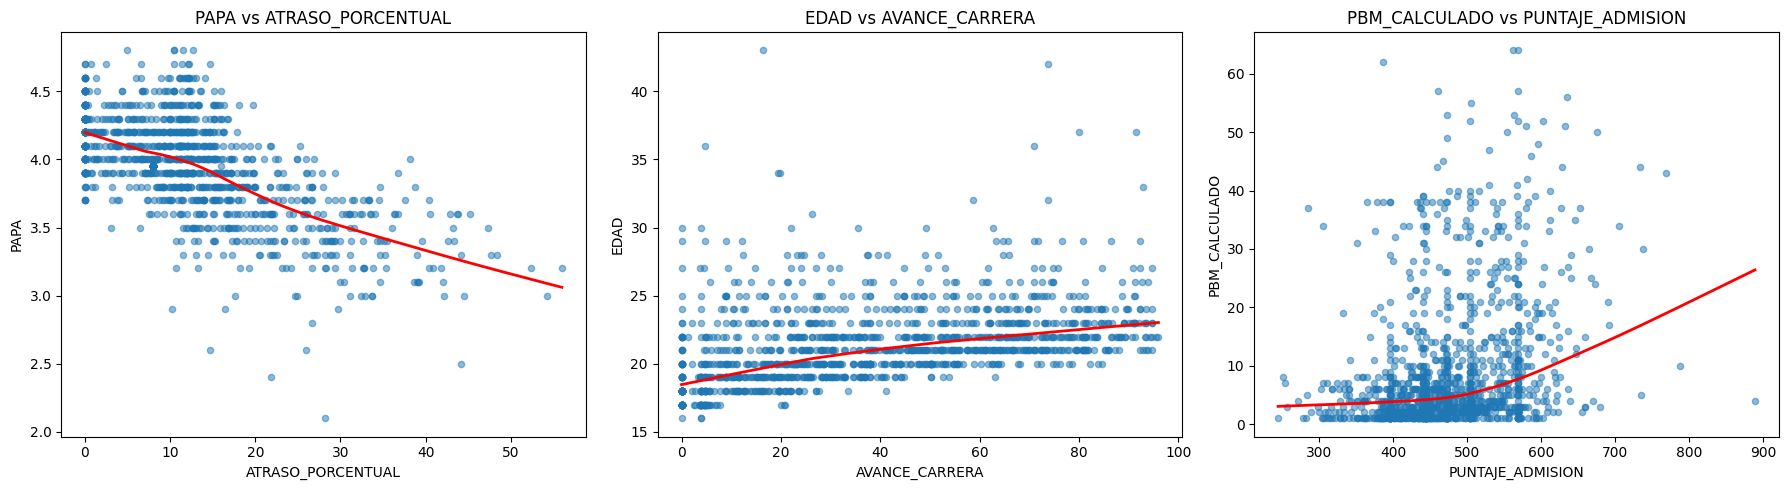

In [8]:


# Relaciones interesantes según Spearman
# Atraso vs PAPA (fuerte negativa)
# Avance Carrera vs Edad (moderada positiva)
# PUNTAJE_ADMISION vs PBM_CALCULADO (débil pero interesante)

# Lista de pares a graficar
pares = [
    ("ATRASO_PORCENTUAL", "PAPA"),
    ("AVANCE_CARRERA", "EDAD"),
    ("PUNTAJE_ADMISION", "PBM_CALCULADO")
]

# Crear los gráficos con curvas de ajuste LOESS
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y) in enumerate(pares):
    sns.regplot(
        data=df, x=x, y=y,
        lowess=True,
        scatter_kws={"s": 20, "alpha": 0.5},
        line_kws={"color": "red", "lw": 2},
        ax=axes[i]
    )
    axes[i].set_title(f"{y} vs {x}", fontsize=12)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()


# 8. Análisis de Redundancia y Multicolinealidad 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Lista de variables numéricas disponibles
variables_numericas = [
    "AVANCE_CARRERA", "AVANCE_ESPERADO", "ATRASO_PORCENTUAL",
    "PAPA", "EDAD", "NUMERO_MATRICULAS", "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Escalar las variables numéricas
X_scaled = StandardScaler().fit_transform(df[variables_numericas])
X_vif = pd.DataFrame(X_scaled, columns=variables_numericas)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))



            Variable        VIF
0     AVANCE_CARRERA  99.941870
1    AVANCE_ESPERADO  84.092543
2  ATRASO_PORCENTUAL  17.689388
3               PAPA   1.927892
4               EDAD   1.333830
6   PUNTAJE_ADMISION   1.247784
5      PBM_CALCULADO   1.096009


In [14]:
# Obtener matriz superior triangular sin la diagonal
cor_matrix_upper = cor_matrix.where(
    pd.np.triu(pd.np.ones(cor_matrix.shape), k=1).astype(bool)
)

# Identificar pares con alta correlación (positiva o negativa)
threshold = 0.9
high_corr_pairs = [
    (col, row, cor_matrix_upper.loc[row, col])
    for col in cor_matrix_upper.columns
    for row in cor_matrix_upper.index
    if abs(cor_matrix_upper.loc[row, col]) > threshold
]

# Mostrar pares redundantes
for var1, var2, corr_val in high_corr_pairs:
    print(f"{var1} y {var2}: correlación = {corr_val:.2f}")


AVANCE_ESPERADO y AVANCE_CARRERA: correlación = 0.91
NUMERO_MATRICULAS y AVANCE_CARRERA: correlación = 0.91
NUMERO_MATRICULAS y AVANCE_ESPERADO: correlación = 1.00


C:\Users\andre\AppData\Local\Temp\ipykernel_17240\4068869046.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(cor_matrix.shape), k=1).astype(bool)
